<div class="alert alert-block alert-info">
Library downloading
</div>

In [2]:
import warnings
warnings. filterwarnings('ignore')

In [97]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_selection import SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
classification_report, RocCurveDisplay, accuracy_score, roc_auc_score
from collections import Counter
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler

<div class="alert alert-block alert-info">
Dataset loading
</div>

In [5]:
bank_marketing = fetch_ucirepo(id=222) 

In [7]:
print(bank_marketing)

{'data': {'ids': None, 'features':        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact

<div class="alert alert-block alert-info">
Data preparation
</div>

In [8]:
X_df = bank_marketing.data.features 
y_df = bank_marketing.data.targets 

In [9]:
print(X_df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [10]:
df_X = pd.DataFrame(X_df)
print(df_X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [11]:
df_y = pd.DataFrame(y_df)
print(df_y)

         y
0       no
1       no
2       no
3       no
4       no
...    ...
45206  yes
45207  yes
45208  yes
45209   no
45210   no

[45211 rows x 1 columns]


In [12]:
# variable information 
print(bank_marketing.variables) 

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

In [13]:
df_all = pd.concat([df_X, df_y], axis=1)
print(df_all)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [14]:
print(df_all.isnull().sum())

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64


In [15]:
category_counts = df_all['pdays'].value_counts(dropna=False)  # dropna=False missing data included
print(category_counts)

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64


In [16]:
category_counts = df_all['previous'].value_counts(dropna=False)  
print(category_counts)

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


In [17]:
category_counts1 = df_all['y'].value_counts(dropna=False)  
print(category_counts1)

y
no     39922
yes     5289
Name: count, dtype: int64


In [18]:
df_nulls = df_all.drop(columns=['contact', 'poutcome', 'duration', 'pdays'])
print(df_nulls)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  campaign  previous    y  

In [19]:
df_cat = df_nulls.dropna()
print(df_cat)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  campaign  previous    y  

In [20]:
print(df_cat.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
campaign       0
previous       0
y              0
dtype: int64


In [22]:
#deleting the observation with the value of the previous variable equal to 275
df = df_cat[df_cat["previous"] != 275]

In [23]:
# transforming a variable
education_order = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3,
}
df_cat['education_cat'] = df_cat['education'].map(education_order)
print(df_cat)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  campaign  previous    y  

In [24]:
# transforming a variable
def job_cat(job):
    if job in ['management', 'technician', 'admin.', 'self-employed', 'entrepreneur']:
        return 'office'
    elif job in ['blue-collar', 'services', 'housemaid']:
        return 'services'
    elif job in ['retired', 'unemployed', 'student'] or pd.isna(job):
        return 'non-wor'

df_cat['job_cat'] = df_cat['job'].apply(job_cat)
print(df_cat)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  campaign  previous    y  

In [25]:
# transforming a variable
def quart(month):
    if month in ['jan', 'feb', 'mar']:
        return 'q1'
    elif month in ['apr', 'may', 'jun']:
        return 'q2'
    elif month in ['jul', 'aug', 'sep']:
        return 'q3'
    elif month in ['oct', 'nov', 'dec']:
        return 'q4'

df_cat['quart'] = df_cat['month'].apply(quart)
print(df_cat)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  campaign  previous    y  

In [26]:
# changing variables to binary variables
df_1 = pd.get_dummies(df_cat, columns=['marital', 'quart', 'job_cat']) 
print(df_1)

       age           job  education default  balance housing loan  \
0       58    management   tertiary      no     2143     yes   no   
1       44    technician  secondary      no       29     yes   no   
2       33  entrepreneur  secondary      no        2     yes  yes   
5       35    management   tertiary      no      231     yes   no   
6       28    management   tertiary      no      447     yes  yes   
...    ...           ...        ...     ...      ...     ...  ...   
45206   51    technician   tertiary      no      825      no   no   
45207   71       retired    primary      no     1729      no   no   
45208   72       retired  secondary      no     5715      no   no   
45209   57   blue-collar  secondary      no      668      no   no   
45210   37  entrepreneur  secondary      no     2971      no   no   

       day_of_week month  campaign  ...  marital_divorced marital_married  \
0                5   may         1  ...             False            True   
1                

In [27]:
# changing variables to binary variables
binary_columns = ['default', 'housing', 'loan', 'y']  
df_1[binary_columns] = df_1[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
print(df_1)

       age           job  education  default  balance  housing  loan  \
0       58    management   tertiary        0     2143        1     0   
1       44    technician  secondary        0       29        1     0   
2       33  entrepreneur  secondary        0        2        1     1   
5       35    management   tertiary        0      231        1     0   
6       28    management   tertiary        0      447        1     1   
...    ...           ...        ...      ...      ...      ...   ...   
45206   51    technician   tertiary        0      825        0     0   
45207   71       retired    primary        0     1729        0     0   
45208   72       retired  secondary        0     5715        0     0   
45209   57   blue-collar  secondary        0      668        0     0   
45210   37  entrepreneur  secondary        0     2971        0     0   

       day_of_week month  campaign  ...  marital_divorced  marital_married  \
0                5   may         1  ...             False

In [28]:
binary_columns1 = ['job_cat_services','job_cat_non-wor', 'job_cat_office', 'quart_q1', 'quart_q2', 'quart_q3', 'quart_q4', 'marital_divorced','marital_married', 'marital_single']  
df_1[binary_columns1] = df_1[binary_columns1].apply(lambda x: x.map({True: 1, False: 0}))
print(df_1)

       age           job  education  default  balance  housing  loan  \
0       58    management   tertiary        0     2143        1     0   
1       44    technician  secondary        0       29        1     0   
2       33  entrepreneur  secondary        0        2        1     1   
5       35    management   tertiary        0      231        1     0   
6       28    management   tertiary        0      447        1     1   
...    ...           ...        ...      ...      ...      ...   ...   
45206   51    technician   tertiary        0      825        0     0   
45207   71       retired    primary        0     1729        0     0   
45208   72       retired  secondary        0     5715        0     0   
45209   57   blue-collar  secondary        0      668        0     0   
45210   37  entrepreneur  secondary        0     2971        0     0   

       day_of_week month  campaign  ...  marital_divorced  marital_married  \
0                5   may         1  ...                 0

In [29]:
print(df_1.isnull().sum())

age                 0
job                 0
education           0
default             0
balance             0
housing             0
loan                0
day_of_week         0
month               0
campaign            0
previous            0
y                   0
education_cat       0
marital_divorced    0
marital_married     0
marital_single      0
quart_q1            0
quart_q2            0
quart_q3            0
quart_q4            0
job_cat_non-wor     0
job_cat_office      0
job_cat_services    0
dtype: int64


In [30]:
#removing unnecessary variables
df = df_1.drop(columns=['job', 'education', 'month'])
print(df)

       age  default  balance  housing  loan  day_of_week  campaign  previous  \
0       58        0     2143        1     0            5         1         0   
1       44        0       29        1     0            5         1         0   
2       33        0        2        1     1            5         1         0   
5       35        0      231        1     0            5         1         0   
6       28        0      447        1     1            5         1         0   
...    ...      ...      ...      ...   ...          ...       ...       ...   
45206   51        0      825        0     0           17         3         0   
45207   71        0     1729        0     0           17         2         0   
45208   72        0     5715        0     0           17         5         3   
45209   57        0      668        0     0           17         4         0   
45210   37        0     2971        0     0           17         2        11   

       y  education_cat  marital_divorc

In [31]:
X_all = df[[
    'age', 'default', 'balance', 'housing', 'loan', 'day_of_week', 'campaign', 'previous', 'quart_q1', 'quart_q2', 'quart_q3', 'quart_q4',
    'education_cat', 'marital_divorced', 'marital_married', 'marital_single','job_cat_non-wor', 'job_cat_office', 'job_cat_services']]
y = df[['y']] 

In [32]:
X_all.head()

,age,default,balance,housing,loan,day_of_week,campaign,previous,quart_q1,quart_q2,quart_q3,quart_q4,education_cat,marital_divorced,marital_married,marital_single,job_cat_non-wor,job_cat_office,job_cat_services
0,58,0,2143,1,0,5,1,0,0,1,0,0,3,0,1,0,0,1,0
1,44,0,29,1,0,5,1,0,0,1,0,0,2,0,0,1,0,1,0
2,33,0,2,1,1,5,1,0,0,1,0,0,2,0,1,0,0,1,0
5,35,0,231,1,0,5,1,0,0,1,0,0,3,0,1,0,0,1,0
6,28,0,447,1,1,5,1,0,0,1,0,0,3,0,0,1,0,1,0


In [33]:
y.head()

,y
0,0
1,0
2,0
5,0
6,0


In [34]:
#training for all variables
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.20, random_state=35)

<div class="alert alert-block alert-info">
Class balancing
</div>

In [35]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=35)

In [36]:
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

In [37]:
smote = SMOTE(random_state=35)

In [38]:
X_train_over_s, y_train_over_s = smote.fit_resample(X_train, y_train)

<div class="alert alert-block alert-info">
Random Forest (unbalanced data)
</div>

In [39]:
rf_clf = RandomForestClassifier(n_estimators = 100, random_state=35, n_jobs=-1)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=35)

In [40]:
param_grid_rf = {
                'n_estimators': [125, 130, 135],  
                 'max_depth': [29, 30, 31],
                'min_samples_split': [2, 3],       
                'min_samples_leaf': [2, 3],
                'criterion': ['gini', 'entropy']
}

In [41]:
# cross validation
my_search_rf = GridSearchCV(rf_clf, 
                         param_grid=param_grid_rf, 
                         cv=5,  
                        scoring='f1',
                         n_jobs=-1)

In [42]:
my_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=35),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [29, 30, 31], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [125, 130, 135]},
             scoring='f1')

In [43]:
print(my_search_rf.best_params_)
print(my_search_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 130}
0.18622524210475797


In [44]:
# training model
rf = RandomForestClassifier(n_estimators = 130, 
                            criterion = 'entropy',
                            min_samples_leaf = 2,
                            min_samples_split = 2,
                            max_depth = 30,
                            random_state=35, 
                            bootstrap=True,
                            n_jobs=-1) 
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       n_estimators=130, n_jobs=-1, random_state=35)

In [45]:
y_pred_rf = rf.predict(X_test)

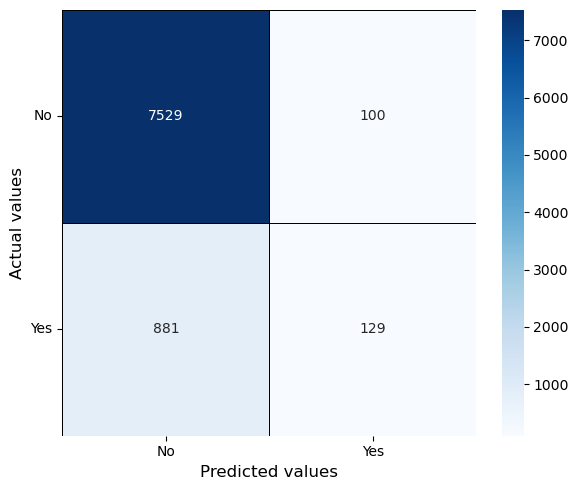

In [46]:
# confusion matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5, linecolor='black',
           xticklabels=["No", "Yes"],
        yticklabels=["No", "Yes"]
)

plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [47]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7629
           1       0.56      0.13      0.21      1010

    accuracy                           0.89      8639
   macro avg       0.73      0.56      0.57      8639
weighted avg       0.86      0.89      0.85      8639



<Figure size 600x500 with 0 Axes>

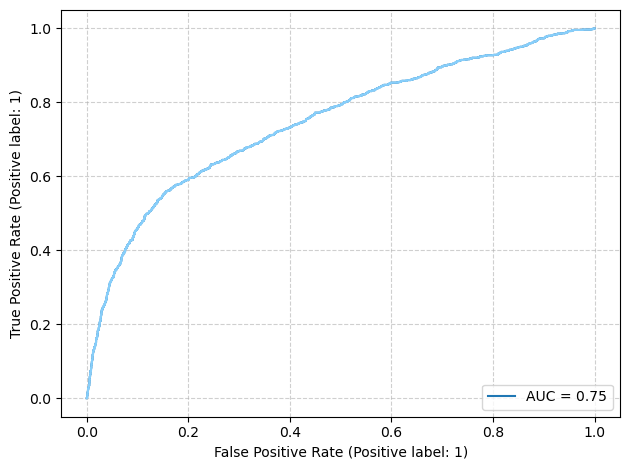

In [53]:
# AUC valueand ROC curve
auc_score = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
roc_display = RocCurveDisplay.from_estimator(rf, X_test, y_test)
roc_display.plot(ax=plt.gca(), color='lightskyblue')

plt.legend([f"AUC = {auc_score:.2f}"], loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [54]:
rf.feature_importances_

array([0.19950687, 0.00255911, 0.23182137, 0.04010347, 0.0175857 ,
       0.18662615, 0.07988289, 0.07783488, 0.01330143, 0.01578714,
       0.02040444, 0.01109001, 0.03658677, 0.00853012, 0.01321669,
       0.01159285, 0.01137018, 0.01031727, 0.01188265])

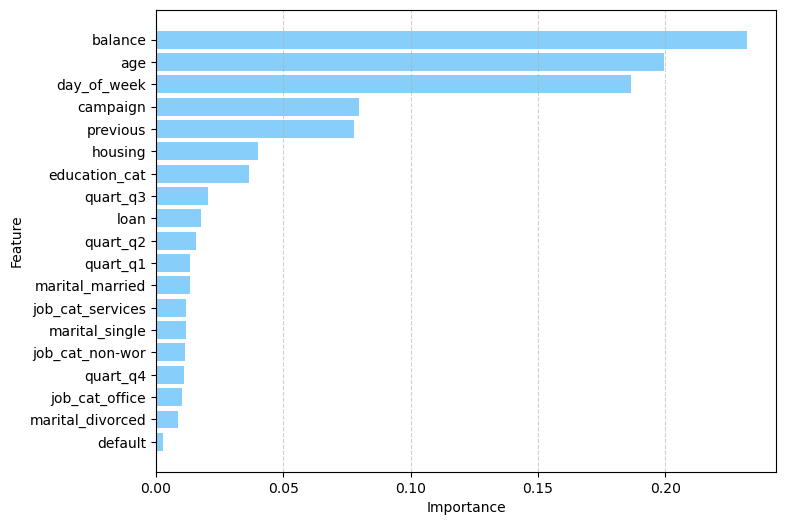

In [55]:
# Feature importances - visualization
features = pd.DataFrame(rf.feature_importances_, index=X_all.columns, columns=['Importances'])

features.sort_values(by=['Importances'], ascending=True, inplace=True)

plt.figure(figsize=(8, 6))
plt.barh(features.index, features['Importances'], color='lightskyblue')

plt.xlabel("Importance")
plt.ylabel("Feature")

plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

<div class="alert alert-block alert-info">
Random Forest (undersampling)
</div>

In [56]:
rf_under = RandomForestClassifier(n_estimators = 100, random_state=35, n_jobs=-1)
rf_under.fit(X_train_undersampled, y_train_undersampled)

RandomForestClassifier(n_jobs=-1, random_state=35)

In [57]:
#cross validation
param_grid_rf_under = {
 'n_estimators': [375, 380, 385], 
    'max_depth': [17, 18, 19],  
    'min_samples_split': [4, 5, 6],  
    'min_samples_leaf': [2, 3],
    'criterion': ['gini', 'entropy'] 
}

In [58]:
my_search_rf_under = GridSearchCV(rf_clf, 
                         param_grid=param_grid_rf_under, 
                         cv=5,  
                        scoring='f1',
                         n_jobs=-1)

In [59]:
my_search_rf_under.fit(X_train_undersampled, y_train_undersampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=35),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [17, 18, 19], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [375, 380, 385]},
             scoring='f1')

In [60]:
print(my_search_rf_under.best_params_)
print(my_search_rf_under.best_score_)

{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 380}
0.6707076829093097


In [61]:
# model traininng
rf_under = RandomForestClassifier(n_estimators = 380, 
                            criterion = 'gini',
                            min_samples_leaf = 2,
                            min_samples_split = 5,
                            max_depth = 18,
                            random_state=35, 
                            bootstrap=True,
                            n_jobs=-1) 
rf_under.fit(X_train_undersampled, y_train_undersampled)

RandomForestClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=380, n_jobs=-1, random_state=35)

In [62]:
y_pred_rf_under = rf_under.predict(X_test)

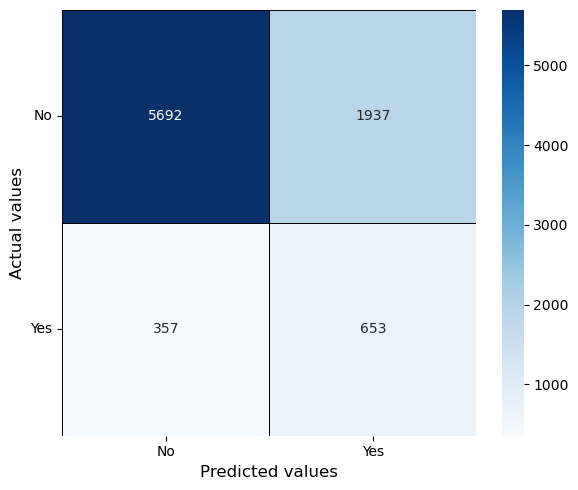

In [63]:
# Confusion matrix
cm = confusion_matrix(y_test, rf_under.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5, linecolor='black',
           xticklabels=["No", "Yes"],  
        yticklabels=["No", "Yes"]   
)

plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [64]:
print(classification_report(y_test, y_pred_rf_under))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      7629
           1       0.25      0.65      0.36      1010

    accuracy                           0.73      8639
   macro avg       0.60      0.70      0.60      8639
weighted avg       0.86      0.73      0.78      8639



<Figure size 600x500 with 0 Axes>

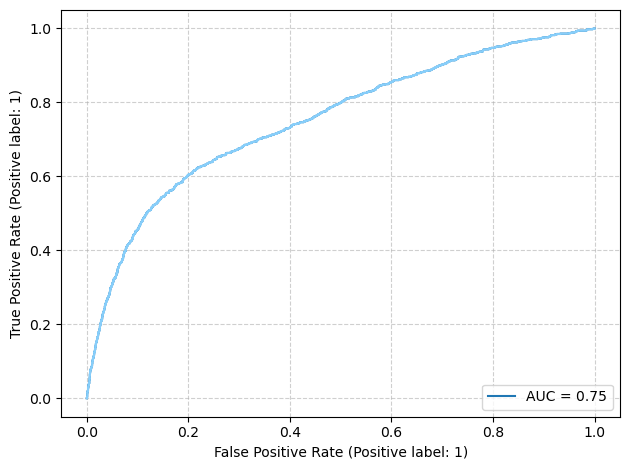

In [65]:
# AUC value and ROC curve
auc_score = roc_auc_score(y_test, rf_under.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
roc_display = RocCurveDisplay.from_estimator(rf_under, X_test, y_test)
roc_display.plot(ax=plt.gca(), color='lightskyblue')

plt.legend([f"AUC = {auc_score:.2f}"], loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [66]:
rf_under.feature_importances_

array([0.17867944, 0.00252855, 0.19791779, 0.06191776, 0.02176521,
       0.16101339, 0.07816401, 0.09418723, 0.01624751, 0.01982089,
       0.02366922, 0.01294703, 0.04035365, 0.00979392, 0.01872494,
       0.01691648, 0.01373348, 0.01333545, 0.01828405])

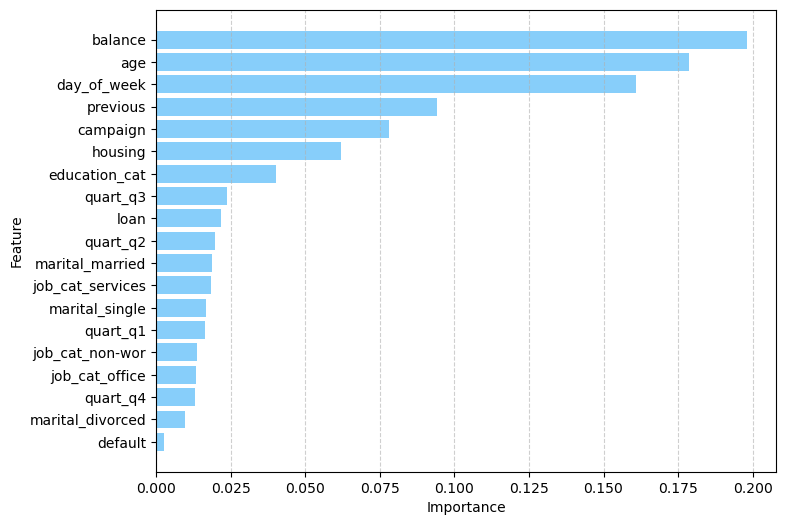

In [67]:
# feature importances - visualization
features = pd.DataFrame(rf_under.feature_importances_, index=X_all.columns, columns=['Importances'])

features.sort_values(by=['Importances'], ascending=True, inplace=True)

plt.figure(figsize=(8, 6))
plt.barh(features.index, features['Importances'], color='lightskyblue')

plt.xlabel("Importance")
plt.ylabel("Feature")

plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

<div class="alert alert-block alert-info">
Random Forest (oversampling SMOTE)
</div>

In [68]:
rf_over_s = RandomForestClassifier(n_estimators = 100, random_state=35, n_jobs=-1)
rf_over_s.fit(X_train_over_s, y_train_over_s)

RandomForestClassifier(n_jobs=-1, random_state=35)

In [69]:
# cross validation
param_grid_rf_over_s = {
    'n_estimators': [265, 270, 275],  
    'max_depth': [26, 27, 28],  
    'min_samples_split': [2, 3],  
    'min_samples_leaf': [2, 3], 
    'criterion': ['gini', 'entropy'] 
}

In [70]:
my_search_rf_over_s = GridSearchCV(rf_over_s, 
                         param_grid=param_grid_rf_over_s, 
                         cv=5,                
                         scoring='f1',
                         n_jobs=-1)

In [71]:
my_search_rf_over_s.fit(X_train_over_s, y_train_over_s)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=35),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [26, 27, 28], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [265, 270, 275]},
             scoring='f1')

In [72]:
print(my_search_rf_over_s.best_params_)
print(my_search_rf_over_s.best_score_)

{'criterion': 'entropy', 'max_depth': 26, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 270}
0.890378919139178


In [73]:
# training model
rf_over_s = RandomForestClassifier(n_estimators = 270, 
                            criterion = 'entropy',
                            min_samples_leaf = 2,
                            min_samples_split = 2,
                            max_depth = 27,
                            random_state=35,
                            bootstrap=True,
                            n_jobs=-1) 
rf_over_s.fit(X_train_over_s, y_train_over_s)


RandomForestClassifier(criterion='entropy', max_depth=27, min_samples_leaf=2,
                       n_estimators=270, n_jobs=-1, random_state=35)

In [74]:
y_pred_rf_over_s = rf_over_s.predict(X_test)

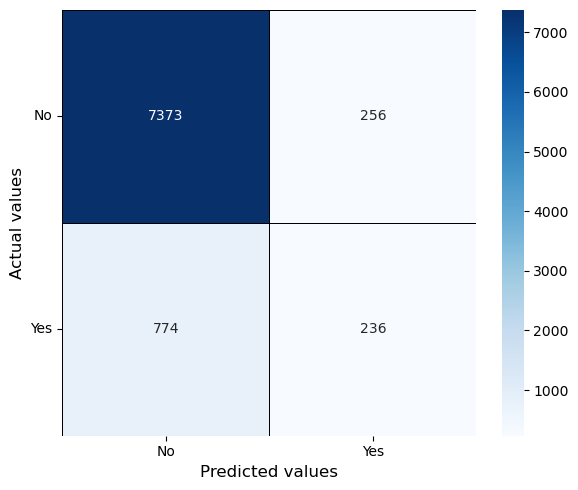

In [75]:
# Confusion matrix
cm = confusion_matrix(y_test, rf_over_s.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5, linecolor='black',
           xticklabels=["No", "Yes"],  
        yticklabels=["No", "Yes"]   
)

plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [76]:
print(classification_report(y_test, y_pred_rf_over_s))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7629
           1       0.48      0.23      0.31      1010

    accuracy                           0.88      8639
   macro avg       0.69      0.60      0.62      8639
weighted avg       0.86      0.88      0.86      8639



<Figure size 600x500 with 0 Axes>

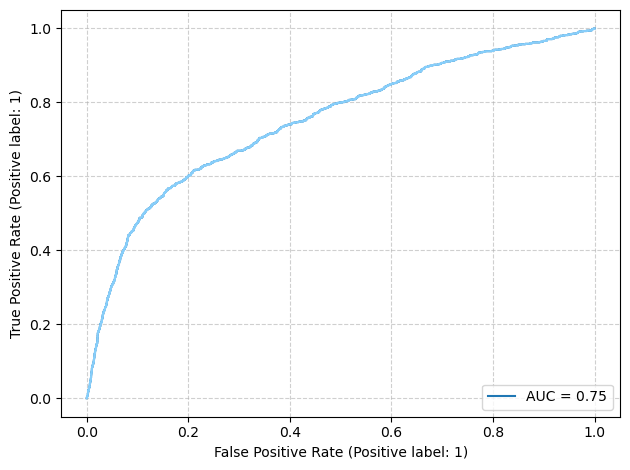

In [77]:
# AUC value and ROC curve
auc_score = roc_auc_score(y_test, rf_over_s.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
roc_display = RocCurveDisplay.from_estimator(rf_over_s, X_test, y_test)
roc_display.plot(ax=plt.gca(), color='lightskyblue')

plt.legend([f"AUC = {auc_score:.2f}"], loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [78]:
rf_over_s.feature_importances_

array([0.07913745, 0.00130938, 0.09832252, 0.08196222, 0.03045415,
       0.08653615, 0.04058251, 0.03634581, 0.05392326, 0.08037168,
       0.07830752, 0.04832644, 0.01999664, 0.0390366 , 0.04274575,
       0.05009448, 0.03453925, 0.04559268, 0.05241549])

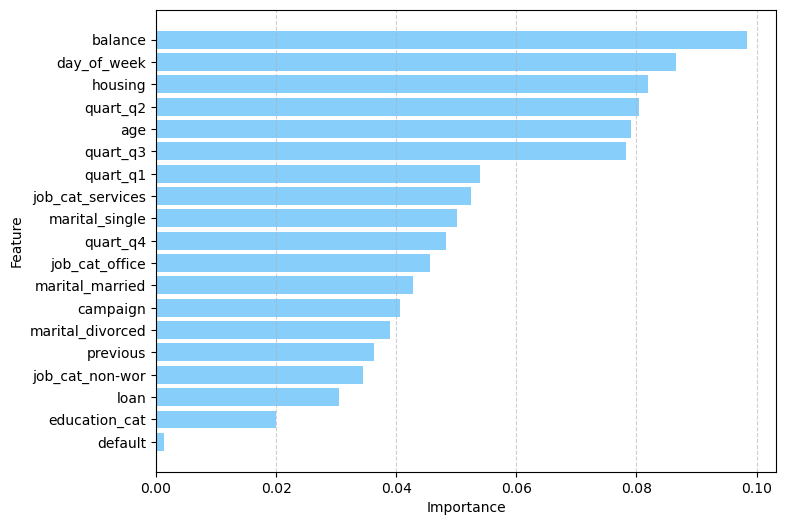

In [80]:
# feature importances - visualization
features = pd.DataFrame(rf_over_s.feature_importances_, index=X_all.columns, columns=['Importances'])

features.sort_values(by=['Importances'], ascending=True, inplace=True)

plt.figure(figsize=(8, 6))
plt.barh(features.index, features['Importances'], color='lightskyblue')

plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.title("Feature Importances")

plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

<div class="alert alert-block alert-info">
Random Forest (clas weightening)
</div>

In [81]:
rf_weight = RandomForestClassifier(n_estimators = 100, class_weight="balanced", random_state=35, n_jobs=-1)
rf_weight.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=35)

In [82]:
# cross validation
param_grid_rf_weight = {
    'n_estimators': [85, 90, 100],
    'max_depth': [18, 19, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [4, 5, 6],
    'criterion': ['gini', 'entropy']
}

In [83]:
my_search_rf_weight = GridSearchCV(rf_weight, 
                         param_grid=param_grid_rf_weight, 
                         cv=5,                
                         scoring='f1',
                         n_jobs=-1)

In [84]:
my_search_rf_weight.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=35),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 19, 20],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 3],
                         'n_estimators': [85, 90, 100]},
             scoring='f1')

In [85]:
print(my_search_rf_weight.best_params_)
print(my_search_rf_weight.best_score_)

{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 90}
0.41920062948269


In [86]:
# training model
rf_weight = RandomForestClassifier(n_estimators = 90, 
                            criterion = 'gini',
                            min_samples_leaf = 5,
                            min_samples_split = 2,
                            max_depth = 19,
                            random_state=35, 
                            n_jobs=-1) 
rf_weight.fit(X_train, y_train)


RandomForestClassifier(max_depth=19, min_samples_leaf=5, n_estimators=90,
                       n_jobs=-1, random_state=35)

In [87]:
y_pred_rf_weight = rf_weight.predict(X_test)

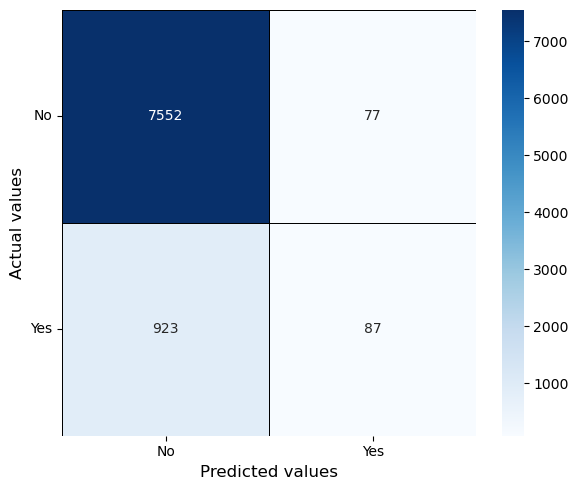

In [88]:
cm = confusion_matrix(y_test, rf_weight.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5, linecolor='black',
           xticklabels=["No", "Yes"],  
        yticklabels=["No", "Yes"]   
)

plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [89]:
print(classification_report(y_test, y_pred_rf_weight))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7629
           1       0.53      0.09      0.15      1010

    accuracy                           0.88      8639
   macro avg       0.71      0.54      0.54      8639
weighted avg       0.85      0.88      0.85      8639



<Figure size 600x500 with 0 Axes>

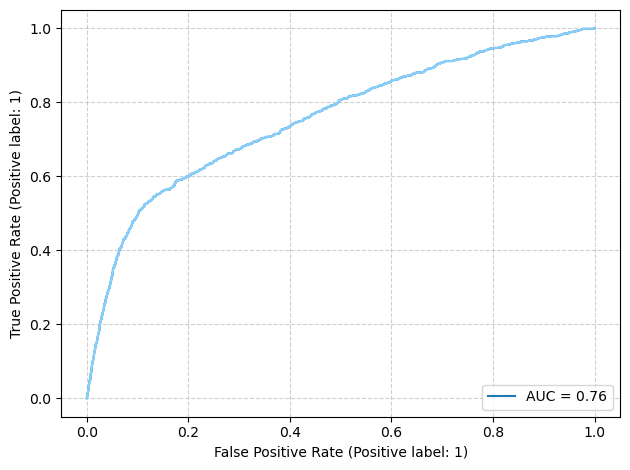

In [90]:
# AUC value and ROV curve 
auc_score = roc_auc_score(y_test, rf_weight.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
roc_display = RocCurveDisplay.from_estimator(rf_weight, X_test, y_test)
roc_display.plot(ax=plt.gca(), color='lightskyblue')

plt.legend([f"AUC = {auc_score:.2f}"], loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [91]:
rf_weight.feature_importances_

array([0.19117384, 0.00107342, 0.18568128, 0.06029783, 0.01631634,
       0.17632935, 0.05781204, 0.12034782, 0.01945124, 0.0196985 ,
       0.03212046, 0.01303629, 0.03183482, 0.00754705, 0.0133439 ,
       0.01323432, 0.01762369, 0.01082094, 0.01225686])

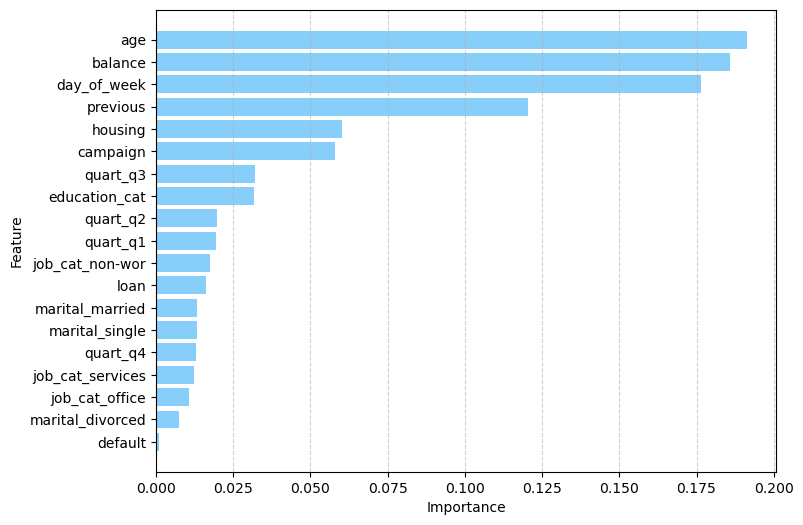

In [92]:
# feature importances - visualization
features = pd.DataFrame(rf_weight.feature_importances_, index=X_all.columns, columns=['Importances'])

features.sort_values(by=['Importances'], ascending=True, inplace=True)

plt.figure(figsize=(8, 6))
plt.barh(features.index, features['Importances'], color='lightskyblue')

plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.title("Feature Importances")

plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

<div class="alert alert-block alert-info">
XGBoost (unbalanced data)
</div>

In [110]:
import xgboost as xgb

In [93]:
xgb = xgb.XGBClassifier(
    n_estimators=400,  
    max_depth=5,        
    learning_rate=0.3,  
    subsample=1,     
    colsample_bytree=1,
    random_state=35
)

In [94]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=35, ...)

In [95]:
# cross validation
param_grid_xgb = {
    'n_estimators': [385, 390, 395],       
    'max_depth': [9, 10, 11],                 
    'learning_rate': [0.1, 0.2], 
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'min_child_weight': [4, 5, 6], 
    'reg_lambda': [1, 2],  
    'reg_alpha': [0.5], 
     'gamma': [0,1],  
}

In [100]:
grid_search_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=35), 
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)


In [101]:
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=35, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [9, 10, 11],
                         'min_child_weight': [4, 5, 6],
                         'n_estimators': [385, 390, 395], 'reg_alpha': [0.5],
                         'reg_lambda': [1, 2], 'subsample': [0.8, 0.9]},
             scoring='f1', verbose=2)

In [102]:
print("The best hyperparameters:", grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

The best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 390, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.8}
0.29230760944313716


In [103]:
# training model
xgb = xgb.XGBClassifier(
    n_estimators=390,  
    max_depth=10,       
    learning_rate=0.2,  
    subsample=0.8,      
    colsample_bytree=0.8,  
    min_child_weight = 5,
    reg_alpha = 0.5,
    reg_lambda = 2,
    gamma = 0,
    random_state=35
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=390, n_jobs=None,
              num_parallel_tree=None, random_state=35, ...)

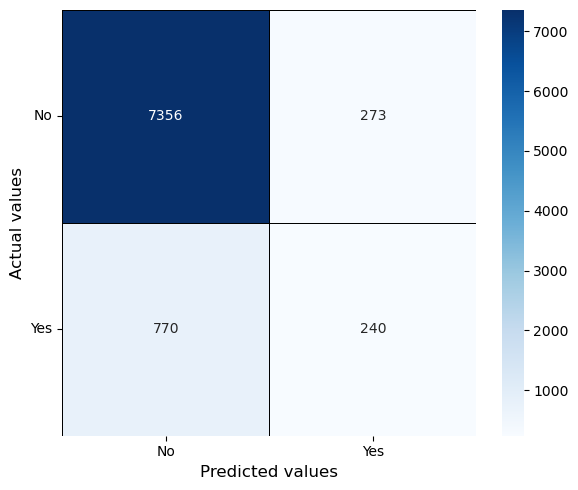

In [104]:
# Confusion matrix
cm = confusion_matrix(y_test, xgb.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5, linecolor='black',
           xticklabels=["No", "Yes"], 
        yticklabels=["No", "Yes"]   
)

plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [105]:
y_pred_xgb = xgb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.8793
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7629
           1       0.47      0.24      0.32      1010

    accuracy                           0.88      8639
   macro avg       0.69      0.60      0.62      8639
weighted avg       0.85      0.88      0.86      8639



In [106]:
xgb.feature_importances_

array([0.04308163, 0.03673103, 0.04391559, 0.09596931, 0.07216708,
       0.04682029, 0.04152475, 0.08198699, 0.07763588, 0.04241421,
       0.06113005, 0.06403349, 0.03981014, 0.04407587, 0.04148984,
       0.04108202, 0.04532959, 0.03606209, 0.04474026], dtype=float32)

<Figure size 600x500 with 0 Axes>

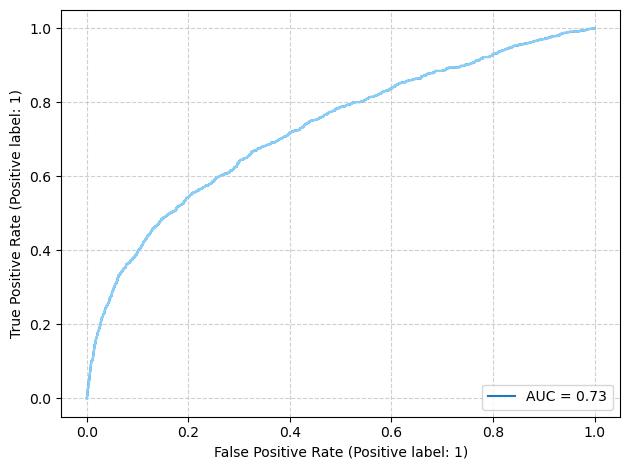

In [107]:
# AUC value and ROC curve
auc_score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
roc_display = RocCurveDisplay.from_estimator(xgb, X_test, y_test)
roc_display.plot(ax=plt.gca(), color='lightskyblue')

plt.legend([f"AUC = {auc_score:.2f}"], loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

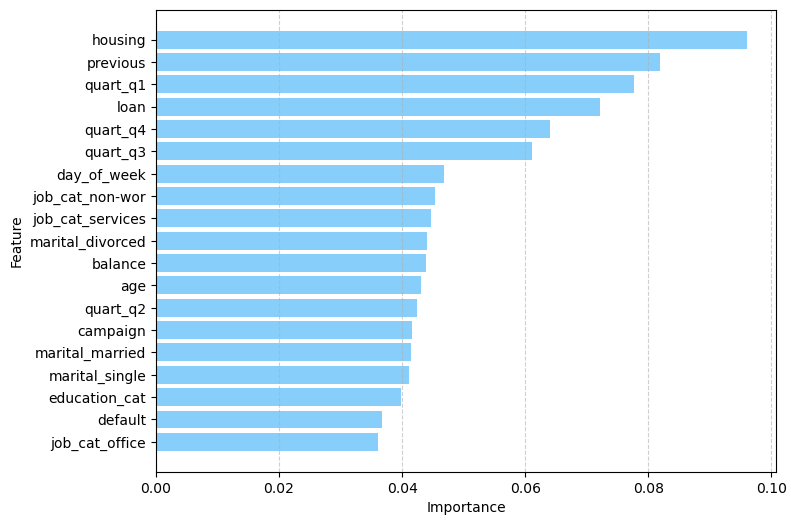

In [108]:
# Fetaure importances
features = pd.DataFrame(xgb.feature_importances_, index=X_all.columns, columns=['Importances'])

features.sort_values(by=['Importances'], ascending=True, inplace=True)

plt.figure(figsize=(8, 6))
plt.barh(features.index, features['Importances'], color='lightskyblue')

plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.title("Feature Importances")

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.grid(axis="y", linestyle="", alpha=0) 

plt.show()

<div class="alert alert-block alert-info">
XGBoost (undersampling)
</div>

In [111]:
import xgboost as xgb

In [112]:
xgb_under = xgb.XGBClassifier(
    n_estimators=100,   
    max_depth=5,       
    learning_rate=0.1,  
    subsample=0.8,     
    colsample_bytree=0.8, 
    random_state=35
)

In [113]:
xgb_under.fit(X_train_undersampled, y_train_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=35, ...)

In [114]:
# cross validation
param_grid_xgb_under = {
    'n_estimators': [180, 185, 190], 
    'max_depth': [8, 9, 10],  
    'learning_rate': [0.1, 0.2],  
    'subsample': [0.8, 0.9], 
    'colsample_bytree': [0.8, 0.9], 
    'min_child_weight': [2, 3, 4], 
    'reg_lambda': [1, 2],  
    'reg_alpha': [0, 0.5],  
    'gamma': [0,1] 
}


In [115]:
grid_search_xgb_under = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=35),
    param_grid=param_grid_xgb_under,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [116]:
grid_search_xgb_under.fit(X_train_undersampled, y_train_undersampled)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=35, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [7, 8, 9],
                         'min_child_weight': [2, 3, 4],
                         'n_estimators': [180, 185, 190], 'reg_alpha': [0, 0.5],
                         'reg_lambda': [1, 2], 'subsample': [0.8, 0.9]},
             scoring='f1', verbose=2)

In [117]:
print("The best hyperparameters:", grid_search_xgb_under.best_params_)
print(grid_search_xgb_under.best_score_)

The best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 185, 'reg_alpha': 0.5, 'reg_lambda': 2, 'subsample': 0.8}
0.6802676378032485


In [118]:
xgb_under = xgb.XGBClassifier(
    n_estimators=185,   
    max_depth=9,        
    learning_rate=0.1, 
    subsample=0.9,     
    colsample_bytree=0.8, 
    min_child_weight = 3,
    reg_alpha = 0.5,
    reg_lambda = 2,
    gamma = 1,
    random_state=35
)

xgb_under.fit(X_train_undersampled, y_train_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=185, n_jobs=None,
              num_parallel_tree=None, random_state=35, ...)

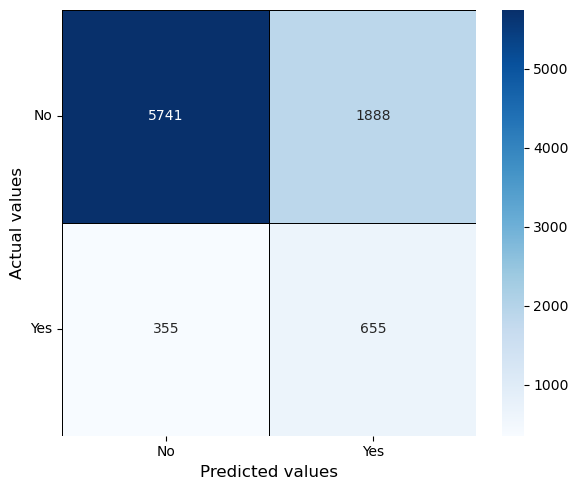

In [119]:
cm = confusion_matrix(y_test, xgb_under.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5, linecolor='black',
           xticklabels=["No", "Yes"], 
        yticklabels=["No", "Yes"] 
)

plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [120]:
y_pred_xgb_under = xgb_under.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_under):.4f}")
print(classification_report(y_test, y_pred_xgb_under))

Accuracy: 0.7404
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      7629
           1       0.26      0.65      0.37      1010

    accuracy                           0.74      8639
   macro avg       0.60      0.70      0.60      8639
weighted avg       0.86      0.74      0.78      8639



<Figure size 600x500 with 0 Axes>

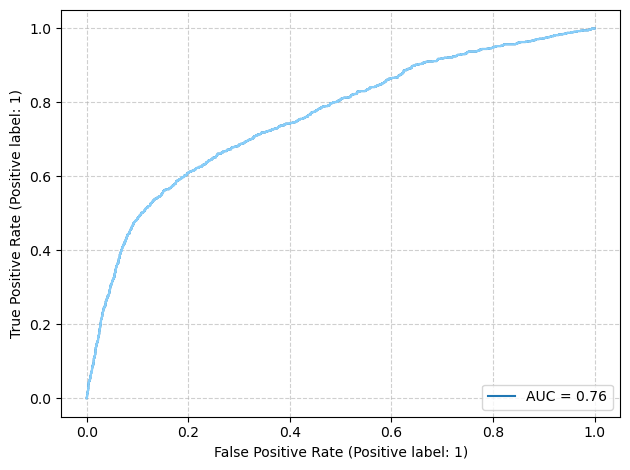

In [121]:
# AUC value and ROC curve
auc_score = roc_auc_score(y_test, xgb_under.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
roc_display = RocCurveDisplay.from_estimator(xgb_under, X_test, y_test)
roc_display.plot(ax=plt.gca(), color='lightskyblue')


plt.legend([f"AUC = {auc_score:.2f}"], loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [122]:
xgb_under.feature_importances_

array([0.03861347, 0.01804365, 0.03012441, 0.21096054, 0.04376425,
       0.0361023 , 0.03112072, 0.1481138 , 0.04980971, 0.0331094 ,
       0.07893982, 0.03842043, 0.03740907, 0.02836987, 0.04276752,
       0.03766633, 0.02850235, 0.02605514, 0.04210714], dtype=float32)

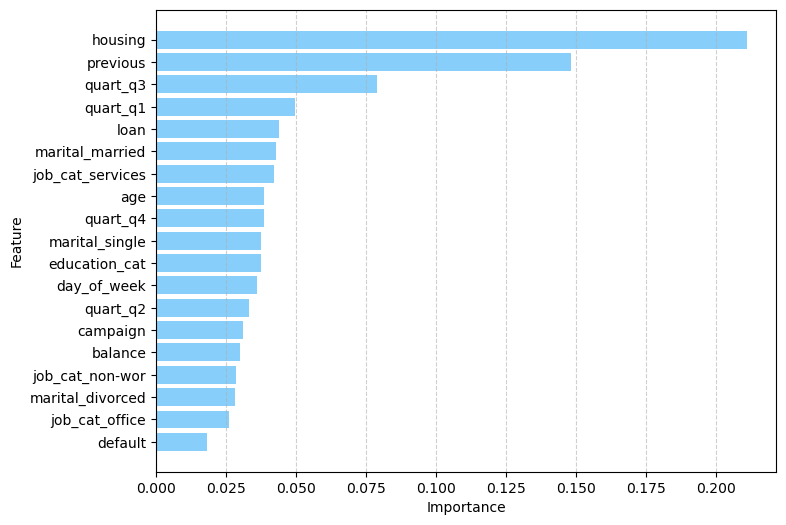

In [123]:
# Feature importances
features = pd.DataFrame(xgb_under.feature_importances_, index=X_all.columns, columns=['Importances'])

features.sort_values(by=['Importances'], ascending=True, inplace=True)

plt.figure(figsize=(8, 6)) 
plt.barh(features.index, features['Importances'], color='lightskyblue')

plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.title("Feature Importances")

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.grid(axis="y", linestyle="", alpha=0) 

plt.show()

<div class="alert alert-block alert-info">
XGBoost (oversampling SMOTE)
</div>

In [124]:
xgb_over_s = xgb.XGBClassifier(
    n_estimators=100,  
    max_depth=5,       
    learning_rate=0.1,  
    subsample=0.8,      
    colsample_bytree=0.8,  
    random_state=35
)

In [125]:
xgb_over_s.fit(X_train_over_s, y_train_over_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=35, ...)

In [130]:
# cross validation
param_grid_xgb_over_s = {
    'n_estimators': [390, 400, 410], 
    'max_depth': [13, 14, 15],  
    'learning_rate': [0.1, 0.2], 
    'subsample': [0.8, 0.9],  
    'colsample_bytree': [0.8, 0.9],  
    'min_child_weight': [2, 3],  
    'reg_lambda': [1, 2],  
    'reg_alpha': [0, 0.5],  
    'gamma': [0,1]  

}

In [131]:
grid_search_xgb_over_s = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=35),
    param_grid=param_grid_xgb_over_s,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [132]:
grid_search_xgb_over_s.fit(X_train_over_s, y_train_over_s)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=35, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0],
                         'learning_rate': [0.1], 'max_depth': [13, 14],
                         'min_child_weight': [2, 3],
                         'n_estimators': [390, 400, 410], 'reg_alpha': [0, 0.5],
                         'reg_lambda': [1, 2], 'subsample': [0.8, 0.9]},
             scoring='f1', verbose=2)

In [133]:
print("The best hyperparameters:", grid_search_xgb_over_s.best_params_)
print(grid_search_xgb_over_s.best_score_)

The best hyperparameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 13, 'min_child_weight': 2, 'n_estimators': 400, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
0.9051308450607224


In [134]:
xgb_over_s = xgb.XGBClassifier(
    n_estimators=400,  
    max_depth=14,       
    learning_rate=0.1,  
    subsample=0.8,      
    colsample_bytree=0.9,  
    min_child_weight = 2,
    reg_alpha = 0,
    reg_lambda = 1,
    gamma = 1,
    random_state=35
)
xgb_over_s.fit(X_train_over_s, y_train_over_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=35, ...)

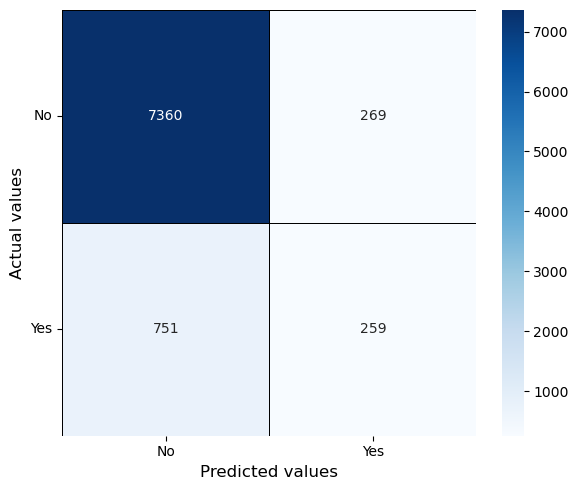

In [135]:
# confusion matrix
cm = confusion_matrix(y_test, xgb_over_s.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5, linecolor='black',
           xticklabels=["No", "Yes"],  
        yticklabels=["No", "Yes"]   
)

plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [136]:
y_pred_xgb_over_s = xgb_over_s.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_over_s):.4f}")
print(classification_report(y_test, y_pred_xgb_over_s))

Accuracy: 0.8819
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7629
           1       0.49      0.26      0.34      1010

    accuracy                           0.88      8639
   macro avg       0.70      0.61      0.64      8639
weighted avg       0.86      0.88      0.87      8639



<Figure size 600x500 with 0 Axes>

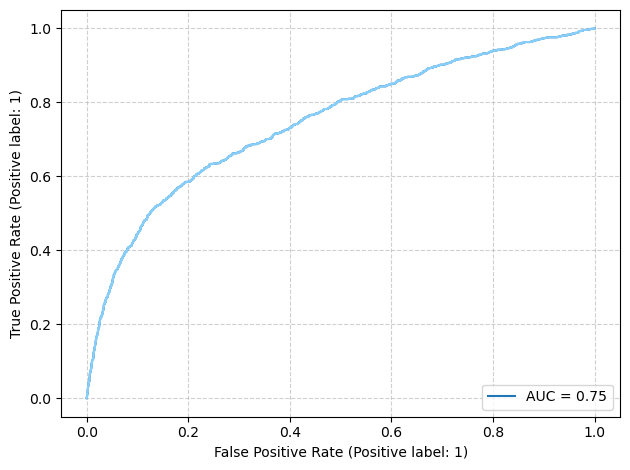

In [137]:
# AUC value and ROC curve
auc_score = roc_auc_score(y_test, xgb_over_s.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
roc_display = RocCurveDisplay.from_estimator(xgb_over_s, X_test, y_test)
roc_display.plot(ax=plt.gca(), color='lightskyblue')

plt.legend([f"AUC = {auc_score:.2f}"], loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [138]:
xgb_over_s.feature_importances_

array([0.00395164, 0.00286725, 0.00384169, 0.20646054, 0.01077085,
       0.00505493, 0.00392467, 0.01003547, 0.1569325 , 0.07284876,
       0.14973645, 0.15485632, 0.00360287, 0.08167309, 0.01985629,
       0.03134104, 0.04390041, 0.01900799, 0.01933724], dtype=float32)

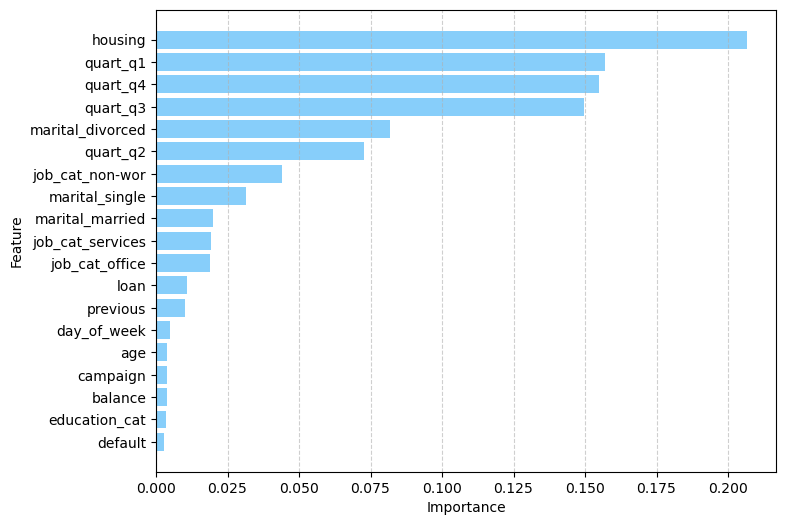

In [139]:
# Features importances
features = pd.DataFrame(xgb_over_s.feature_importances_, index=X_all.columns, columns=['Importances'])

features.sort_values(by=['Importances'], ascending=True, inplace=True)

plt.figure(figsize=(8, 6))  
plt.barh(features.index, features['Importances'], color='lightskyblue')

plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.title("Feature Importances")

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.grid(axis="y", linestyle="", alpha=0) 

plt.show()

<div class="alert alert-block alert-info">
XGBoost (weighted data)
</div>

In [140]:
import xgboost as xgb

In [141]:
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

In [142]:
xgb_weight = xgb.XGBClassifier(
    n_estimators=100,  
    max_depth=5,        
    learning_rate=0.1,  
    subsample=0.8,      
    colsample_bytree=0.8,  
    random_state=35
)

In [143]:
# cross validation
param_grid_xgb_weighted = {
    'n_estimators': [100, 110],  
    'max_depth': [14, 15, 16], 
    'learning_rate': [0.05, 0.1],  
    'subsample': [0.7, 0.8],  
    'colsample_bytree': [0.7, 0.8], 
    'min_child_weight': [2, 3, 4],  
    'reg_lambda': [2, 3],  
    'reg_alpha': [0.5, 1],  
    'gamma': [1, 2]  
}


In [144]:
grid_search_xgb_weight = GridSearchCV(
    xgb_weight,
    param_grid=param_grid_xgb_weighted,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search_xgb_weight.fit(X_train, y_train, sample_weight=sample_weights)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


In [ ]:
print("The best hyperparameters:", grid_search_xgb_weight.best_params_)
print(grid_search_xgb_weight.best_score_)

In [ ]:
# training model
xgb_weight = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=15,        
    learning_rate=0.05, 
    subsample=0.8,      
    colsample_bytree=0.7,  
    min_child_weight = 3,
    reg_alpha = 0.5,
    reg_lambda = 2,
    gamma = 1,
    random_state=35
)
xgb_weight.fit(X_train, y_train, sample_weight=sample_weights)

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, xgb_weight.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5, linecolor='black',
           xticklabels=["No", "Yes"], 
        yticklabels=["No", "Yes"]   
)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
y_pred_xgb_weight = xgb_weight.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_weight):.4f}")
print(classification_report(y_test, y_pred_xgb_weight))

In [ ]:
# AUC value and ROC curve
auc_score = roc_auc_score(y_test, xgb_weight.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
roc_display = RocCurveDisplay.from_estimator(xgb_weight, X_test, y_test)
roc_display.plot(ax=plt.gca(), color='lightskyblue')

plt.legend([f"AUC = {auc_score:.2f}"], loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
xgb_weight.feature_importances_

In [ ]:
# Feature importances
features = pd.DataFrame(xgb_weight.feature_importances_, index=X_all.columns, columns=['Importances'])

features.sort_values(by=['Importances'], ascending=True, inplace=True)

plt.figure(figsize=(8, 6))
plt.barh(features.index, features['Importances'], color='lightskyblue')

plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.title("Feature Importances")

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.grid(axis="y", linestyle="", alpha=0) 
plt.show()